In [2]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd
import os
import tensorflow as tf
import env  

In [3]:
import utils.data as dt
from torch.utils.data import ConcatDataset, DataLoader

# Define the transformation for data augmentation
train_augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    transforms.RandomVerticalFlip(p=0.5),  # Random vertical flip
    transforms.RandomRotation(degrees=15),  # Random rotation within ±15 degrees
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),  # Random crop and resize
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),  # Color jitter
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Random perspective transformation
    transforms.ToTensor(),  # Convert to Tensor
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random'),  # Random erasing
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Define basic image preprocessing without augmentation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image
    transforms.ToTensor(),  # Convert to Tensor
])

# Load training and validation data
train_df = pd.read_csv('../train.csv')  # Assuming train.csv contains image filenames and labels
test_df = pd.read_csv('../test.csv')

# Split the training data into training and validation sets (80% training, 20% validation)
train_size = int(0.8 * len(train_df))
val_size = len(train_df) - train_size


train_df_split = train_df.sample(n=train_size, random_state=42)
val_df_split = train_df.drop(train_df_split.index)


train_dataset1 = dt.constructImageDataseTrain(dataframe=train_df_split, img_dir='../train', transform=train_augment_transform)

train_dataset = dt.constructImageDataseTrain(dataframe=train_df_split, img_dir='../train', transform=train_transform)

# Create data loaders for both datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
train_loader_augment = DataLoader(train_dataset1, batch_size=32, shuffle=False)


train images


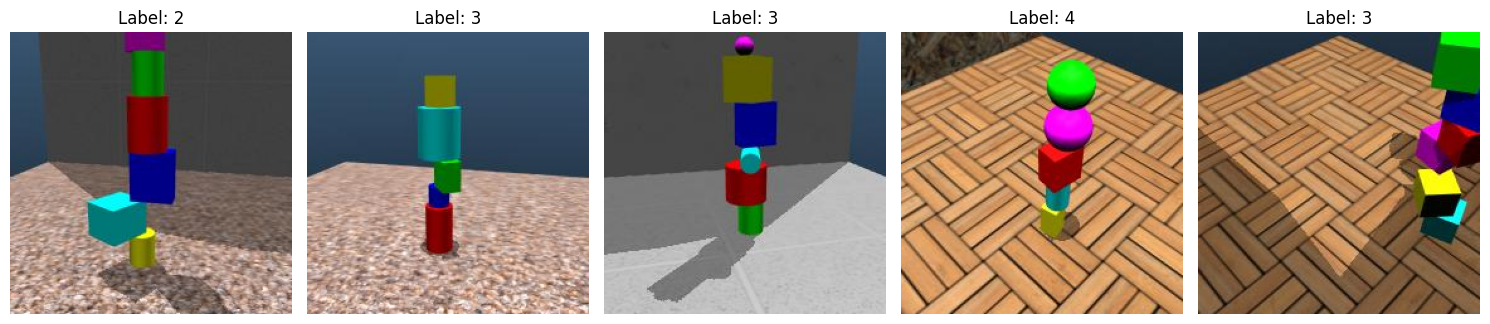

train augmented images


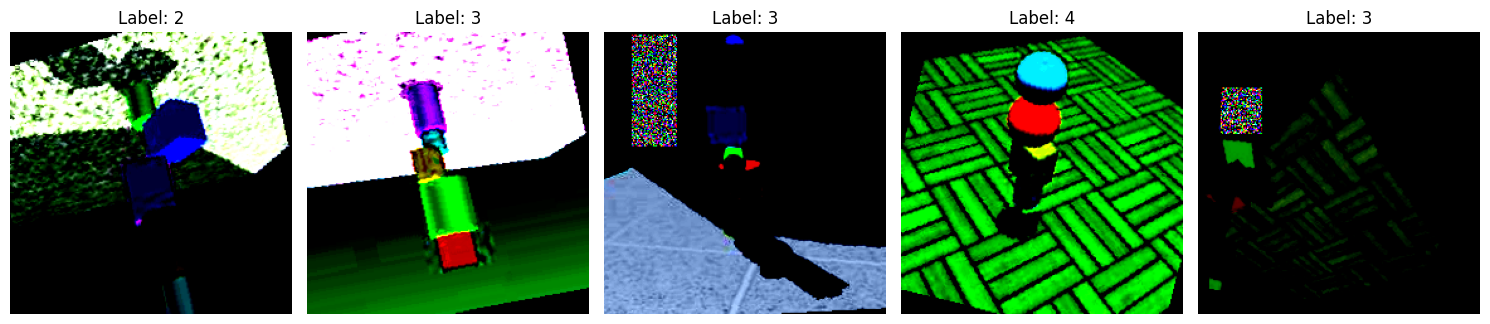

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show_image1(train_loader):
    global count, max_images, fig, axes, images, labels, i, img
    # Initialize a counter
    count = 0
    max_images = 5  # Set the number of images to display
   
    fig, axes = plt.subplots(1, max_images, figsize=(15, 5))  # 1 row, max_images columns

    # Iterate over the training data loader
    for images, labels in train_loader:
        # Iterate through each image in the current batch
        for i in range(images.size(0)):
            if count >= max_images:
                break

         
            # print(f"Image {count + 1}{images[i].size()}")

            # Convert Tensor to numpy array and reshape
            img = images[i].numpy().transpose(1, 2, 0)  

            # If images are normalized, denormalize them to recover original pixel values
            img = img * 255
            img = np.clip(img, 0, 255).astype(np.uint8)  

            axes[count].imshow(img)
            axes[count].set_title(f'Label: {labels[i].item()}')
            axes[count].axis('off')  # Hide axis

            count += 1

        if count >= max_images:
            break

    plt.tight_layout()
    plt.show()

print("train images")
show_image1(train_loader)

print("train augmented images")
show_image1(train_loader_augment)


In [7]:
import pandas as pd

# Load the data
train_df = pd.read_csv('../train.csv')

# Create an empty dictionary to store the results
summary_data = {}

# Iterate over each column to get the unique values and their counts
for column in train_df.columns:
    value_counts = train_df[column].value_counts()  # Get the count of each value
    summary_data[column] = value_counts

# Print the values and their counts for each column
for column, counts in summary_data.items():
    print(f"\nValue distribution for column '{column}':")
    print(counts)



Value distribution for column 'id':
id
54        1
173       1
676333    1
676315    1
676231    1
         ..
338921    1
338904    1
338791    1
338757    1
999668    1
Name: count, Length: 7680, dtype: int64

Value distribution for column 'shapeset':
shapeset
2    5120
1    2560
Name: count, dtype: int64

Value distribution for column 'type':
type
1    3840
2    3840
Name: count, dtype: int64

Value distribution for column 'total_height':
total_height
6    2304
5    1920
4    1536
3    1152
2     768
Name: count, dtype: int64

Value distribution for column 'instability_type':
instability_type
1    3840
0    1920
2    1920
Name: count, dtype: int64

Value distribution for column 'cam_angle':
cam_angle
1    5760
2    1920
Name: count, dtype: int64

Value distribution for column 'stable_height':
stable_height
2    1920
1    1920
3    1536
4    1152
5     768
6     384
Name: count, dtype: int64
